In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Others
!pip install gdown
from tqdm import tqdm #ProgressBar
!pip install ipython-autotime #Time Execution
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 4.0 MB/s 
time: 451 µs (started: 2022-09-26 11:41:44 +00:00)


In [3]:
!pip install detecto

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 3.94 s (started: 2022-09-26 11:41:49 +00:00)


In [4]:
import torch
import torchvision
import matplotlib.pyplot as plt

from torchvision import transforms
from detecto import core, utils, visualize

time: 4.45 s (started: 2022-09-26 11:42:03 +00:00)


In [5]:
#DeepLearning
import keras
import tensorflow as tf

from keras import optimizers
import tensorflow.keras.optimizers as Optimizer
from keras.models import Sequential, Model
import tensorflow.keras.models as Models
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization, Input, GlobalAveragePooling2D

from keras import backend as K
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint

from tensorflow.keras.layers import Input, DepthwiseConv2D
from tensorflow.keras.layers import Conv2D, BatchNormalization
from tensorflow.keras.layers import ReLU, AvgPool2D, Flatten, Dense
from tensorflow.keras import Model

time: 3.59 s (started: 2022-09-26 11:42:51 +00:00)


In [7]:
from detecto import core, utils, visualize
from detecto.visualize import show_labeled_image, plot_prediction_grid
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

time: 1.32 ms (started: 2022-09-26 11:46:45 +00:00)


In [6]:
#Import object detection Model
model_od = core.Model.load('/content/drive/MyDrive/Data Capstone/Model/Object Detection/model_weights.pth', ['Biji Kakao'])

#Import Classification Model
model_clf = keras.models.load_model('/content/drive/MyDrive/Data Capstone/Model/Classification/model_mobileNet_100_rlr_86.h5')

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

time: 9.71 s (started: 2022-09-26 11:46:26 +00:00)


### Prediksi

In [24]:
reverse_mapping_col={0:(255,0,0),1:(255,165,0),2:(255,255,0),3:(0,255,0)}

def mapper_col(value):
    return reverse_mapping_col[value]

reverse_mapping={0:'Insect',1:'Other',2:'Mould',3:'Normal'}

def mapper(value):
    return reverse_mapping[value]

time: 1.9 ms (started: 2022-09-26 12:03:30 +00:00)


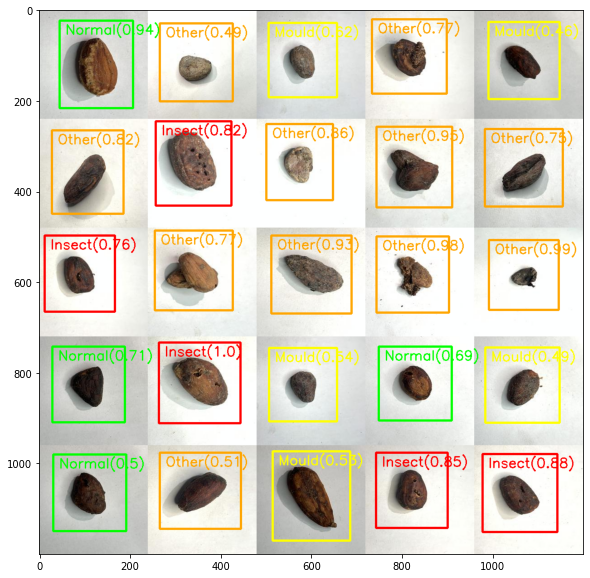

time: 8.44 s (started: 2022-09-26 12:15:24 +00:00)


In [28]:
import cv2
from google.colab.patches import cv2_imshow

thresh=0.8
image_ = utils.read_image('/content/drive/MyDrive/Data Capstone/Object Detection/merged_20.jpg')
#image_ = cv2.resize(image_, (1200,1200), interpolation= cv2.INTER_LINEAR)
predictions = model_od.predict(image_)
labels, boxes, scores = predictions
filtered_indices=np.where(scores>thresh)
filtered_boxes=boxes[filtered_indices]
area = filtered_boxes.numpy()
result = []
for a in area :
  xmin = np.floor(a[0]).astype(int)
  ymin = np.floor(a[1]).astype(int)
  xmax = np.floor(a[2]).astype(int)
  ymax = np.floor(a[3]).astype(int)
  crop_img = image_[ymin:ymax, xmin:xmax]
  cv2.imwrite("/content/temp.png",crop_img)
  img_=load_img("/content/temp.png", target_size=(224,224))
  image=img_to_array(img_)
  prediction_image=np.array(crop_img)
  prediction_image= np.expand_dims(image, axis=0)
  prediction=model_clf.predict(prediction_image)
  score = round(np.max(prediction),2)
  value=np.argmax(prediction)
  result.append(value)
  label = mapper(value)+"("+str(score)+")"
  cv2.putText(image_, label, (xmin+13, ymin + 30),
  cv2.FONT_HERSHEY_SIMPLEX, 1, mapper_col(value), 2)
  cv2.rectangle(image_, (xmin, ymin), (xmax, ymax), mapper_col(value), 3)
  # cv2_imshow(crop_img)
  # print("prediksinya adalah biji jenis " +mapper(value))

fig = plt.figure(figsize =(10, 10))
plt.imshow(image_)